In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
"""
Credit Card Fraud Detection
"""


'\nCredit Card Fraud Detection\n'

In [6]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('C:/Users/rudhv/OneDrive/Desktop/VS_Code/Credit Card Fraud Detection/creditcard.csv')

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    9961
1      38
Name: count, dtype: int64

In [8]:

"""
This Dataset is highly unblanced-

0 = Normal Transaction = 2.84 Lakh
1 = Fraudulent transaction = 492

"""

'\nThis Dataset is highly unblanced-\n\n0 = Normal Transaction = 2.84 Lakh\n1 = Fraudulent transaction = 492\n\n'

(array([35.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.   ,  180.968,  361.936,  542.904,  723.872,  904.84 ,
        1085.808, 1266.776, 1447.744, 1628.712, 1809.68 ]),
 <BarContainer object of 10 artists>)

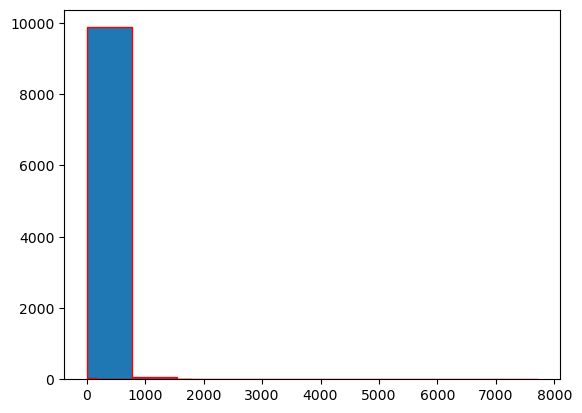

In [9]:
# separating the data (based on the two labels) for analysis
legit = credit_card_data.loc[(credit_card_data.Class==0)]
fraud = credit_card_data.loc[(credit_card_data.Class==1)]


# prepare a histogram of amount for both the categories
plt.hist(legit.Amount, edgecolor="red", bins=10)
plt.hist(fraud.Amount, edgecolor="red", bins=10)

In [10]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,5953.310109,-0.235837,0.268366,0.934095,0.243490,-0.041770,0.141696,-0.057655,-0.069438,0.814125,...,0.025802,-0.055023,-0.152622,-0.033326,0.022768,0.087389,0.107382,0.003549,0.001566,62.972075
1,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


In [11]:
"""
Under-Sampling
Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
"""

'\nUnder-Sampling\nBuild a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions\n'

In [14]:
legit_sample = legit.sample(492)

new_dataset = pd.concat([legit_sample, fraud], ignore_index=True)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2204,-0.528280,1.297138,1.497918,1.128073,1.015072,0.182683,1.317492,-0.331670,-1.169024,...,-0.056918,-0.080751,-0.286461,-0.652466,-0.042145,-0.245139,-0.188071,-0.102000,39.05,0
1,13447,0.856832,0.735190,0.590384,3.050638,0.119472,0.014752,0.094623,-0.012833,1.184346,...,-0.197678,-0.041749,0.191980,0.115365,-0.893302,-0.124344,-0.212396,-0.342222,10.60,0
2,10971,1.159447,-0.107846,0.869490,0.225286,-0.775176,-0.493984,-0.494857,-0.072841,1.442158,...,0.001389,0.185799,-0.050605,0.365975,0.176022,1.010212,-0.096271,0.000193,39.00,0
3,7584,1.068680,0.016890,0.352772,1.451562,-0.035823,0.356734,-0.188405,0.152041,1.573906,...,-0.215908,-0.341843,-0.119898,-0.389781,0.585336,-0.347505,-0.009116,-0.000236,48.88,0
4,14454,-2.907468,2.273657,-0.311679,-0.827752,-1.773097,-0.616131,-1.566515,2.126202,0.710742,...,0.251098,0.241963,0.049184,0.004556,-0.288442,0.829032,-0.666409,-0.104953,14.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.00,1
526,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1
527,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1
528,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1


In [15]:
# Splitting the data into Features & Targets
X = new_dataset.iloc[:,:-1]
Y = new_dataset.iloc[:,-1]


#Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [17]:

# Model training using Logistic Regression
model = LogisticRegression()

# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

c:\Users\rudhv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [19]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9905660377358491
